In [1]:
from functions import *

In [2]:
n = 5
T = 0.1
t_max = 10
interpolator_kind = 'cubic'

In [3]:
def loss_ra(ramp_up_schedule, n, T, t_max, interpolator_kind='linear'):
    '''
    Computes the negative average delta for multiple random Ising models 
    using for a given ramp-up schedule and maximum time.
    '''
    
    n_random_models = 10

    schedule = get_symmetric_schedule(ramp_up_schedule) # mirror and append the ramp up schedule
    schedule_interpolator = get_schedule_interpolator(schedule, kind=interpolator_kind) # get an interpolating function for the continuos schedule
    
    delta_sum = 0    
    for seed in range(n_random_models):
        m = RandomIsingModel(n=n, seed=seed)
        proposal_mat_ra = get_proposal_mat_ra(m, schedule_interpolator, t_max, assert_symmetry=False)
        P = get_transition_matrix(m, T, proposal_mat_ra)
        delta_sum += get_delta(P)
    
    delta_avg = delta_sum / n_random_models
    return -delta_avg

Initial spectral gap =  0.0487


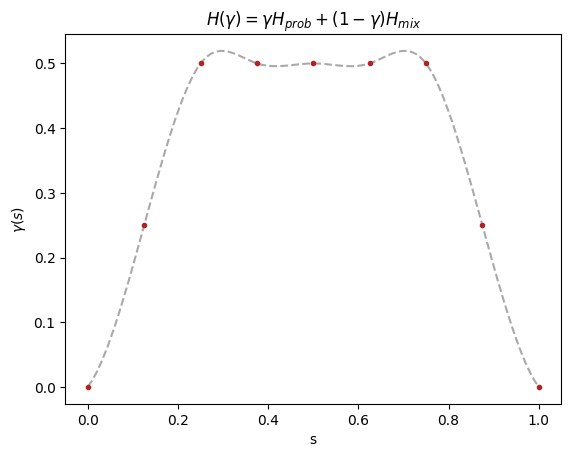

In [4]:
f_max = 0.5
ramp_up_schedule_init = np.concatenate([np.linspace(0, f_max, 3), np.ones(2)*f_max])

loss_init = loss_ra(ramp_up_schedule_init, n, T, t_max, interpolator_kind=interpolator_kind)
print('Initial spectral gap = ', -loss_init.round(4))

schedule_init = get_symmetric_schedule(ramp_up_schedule_init) # mirror and append the ramp up schedule
plot_schedule(schedule_init, get_schedule_interpolator(schedule_init, interpolator_kind))


   Normal return from subroutine COBYLA

   NFVALS =  111   F =-1.144552E-01    MAXCV = 0.000000E+00
   X = 3.801204E-02   4.920498E-01   4.692071E-01   4.175272E-01   4.881145E-01


Optimized spectral gap =  0.1145


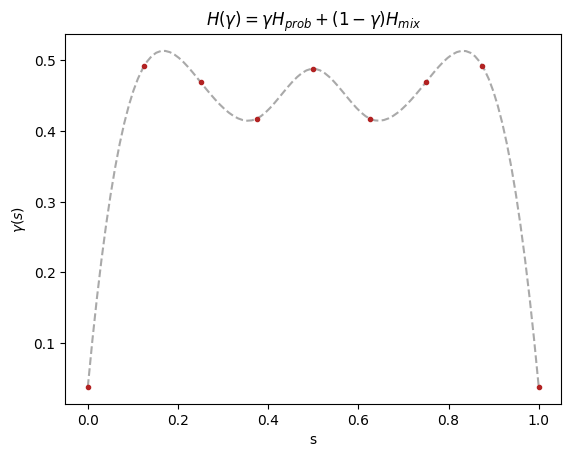

In [5]:
res = minimize(loss_ra, 
               ramp_up_schedule_init, 
               args=(n, T, t_max, interpolator_kind),
               method='COBYLA',
               options={"disp":True, "maxiter":400})  

loss_opt = loss_ra(res.x, n, T, t_max, interpolator_kind=interpolator_kind)
print('Optimized spectral gap = ', -loss_opt.round(4))

schedule_opt = get_symmetric_schedule(res.x)
plot_schedule(schedule_opt, get_schedule_interpolator(schedule_opt, interpolator_kind)) 

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.14455D-01    |proj g|=  3.98722D-01



At iterate    1    f= -1.14459D-01    |proj g|=  2.02746D-02



At iterate    2    f= -1.14480D-01    |proj g|=  1.85035D-02



At iterate    3    f= -1.14481D-01    |proj g|=  3.80843D-01



At iterate    4    f= -1.14484D-01    |proj g|=  1.82281D-02



At iterate    5    f= -1.14488D-01    |proj g|=  1.78270D-02



At iterate    6    f= -1.14537D-01    |proj g|=  2.40519D-02



At iterate    7    f= -1.14646D-01    |proj g|=  3.95358D-02



At iterate    8    f= -1.14732D-01    |proj g|=  3.81590D-02



At iterate    9    f= -1.14787D-01    |proj g|=  3.42684D-02



At iterate   10    f= -1.14790D-01    |proj g|=  3.41070D-02
  ys=-7.316E-08  -gs= 2.321E-06 BFGS update SKIPPED



At iterate   11    f= -1.14790D-01    |proj g|=  3.30864D-02



At iterate   12    f= -1.14857D-01    |proj g|=  1.60828D-02



At iterate   13    f= -1.14885D-01    |proj g|=  1.42972D-02



At iterate   14    f= -1.14897D-01    |proj g|=  1.37968D-02



At iterate   15    f= -1.14898D-01    |proj g|=  1.34611D-02



At iterate   16    f= -1.14900D-01    |proj g|=  1.32351D-02



At iterate   17    f= -1.14904D-01    |proj g|=  1.39839D-02



At iterate   18    f= -1.14904D-01    |proj g|=  1.41371D-02



At iterate   19    f= -1.14906D-01    |proj g|=  1.44691D-02



At iterate   20    f= -1.14909D-01    |proj g|=  1.49331D-02



At iterate   21    f= -1.14917D-01    |proj g|=  1.57320D-02



At iterate   22    f= -1.14970D-01    |proj g|=  1.59656D-02



At iterate   23    f= -1.14974D-01    |proj g|=  1.58863D-02



At iterate   24    f= -1.14974D-01    |proj g|=  1.48798D-02
  ys=-5.438E-09  -gs= 1.124E-07 BFGS update SKIPPED



At iterate   25    f= -1.14974D-01    |proj g|=  3.89414D-02



At iterate   26    f= -1.14974D-01    |proj g|=  6.67492D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     26    122      1     2     0   6.675D-02  -1.150D-01
  F = -0.11497407160791809     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


Optimized spectral gap =  0.115


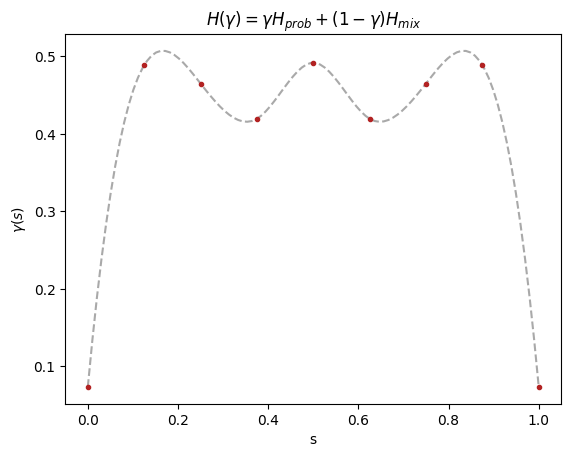

In [6]:
res_finetuned = minimize(loss_ra, 
                         res.x, 
                         args=(n, T, t_max, interpolator_kind),
                         method='L-BFGS-B',
                         options={"disp":True, "maxiter":200})

loss_finetuned = loss_ra(res_finetuned.x, n, T, t_max, interpolator_kind=interpolator_kind)
print('Optimized spectral gap = ', -loss_finetuned.round(4))

schedule_finetuned = get_symmetric_schedule(res_finetuned.x)
plot_schedule(schedule_finetuned, get_schedule_interpolator(schedule_finetuned, interpolator_kind)) 

In [7]:
ra_exp = {'n': n,
          'T': T,
          'interpolator_kind': interpolator_kind,
          't_max': t_max,
          'schedule_init': schedule_init.tolist(),
          'schedule_opt': schedule_opt.tolist(),
          'schedule_finetuned': schedule_finetuned.tolist(),
          'loss_init': loss_init,
          'loss_opt': loss_opt,
          'loss_finetuned': loss_finetuned,
          'first_optimizer': 'COBYLA',
          'second_optimizer': 'L-BFGS-B',
          'n_random_models': 10
          }

save_in_json(ra_exp, 'n5_cubic_cobyla_lbfgsb.json')